# 신경망

## 인공 신경망
- 여러 개의 다층 퍼셉트론을 층처럼 겹겹이 쌓은 것
- 인공신경망의 퍼셉트론 : unit, node

## 활성화 함수
- 퍼셉트론의 결과물을 1 또는 0으로 활성화 시키는 조건을 만드는 함수
- 계단 함수 이용
- 퍼셉트론(=unit=node)의 활성화 함수를 우리 마음대로 바꿀 수 있다.
- 비선형 함수이다. 선형 함수를 사용하는 것은 신경망의 층을 깊게 해서 네트워크를 구성하는 의미 X

### 1. 시그모이드(sigmoid, $\sigma$)
- $\sigma(z) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-z} }$
- 출력 : 0~1사이의 값
- 미분 가능 함수

In [1]:
# 계단 함수와 시그모이드 함수를 시각적으로 확인해보자.
import numpy as np
import matplotlib.pyplot as plt

# 계단 함수
def step_function(x):
  return np.array(x>0, dtype=np.int)
# 입력값이 0보다 크면 1 출력
# 0보다 작으면 0 출력

# 시그모이드 함수
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

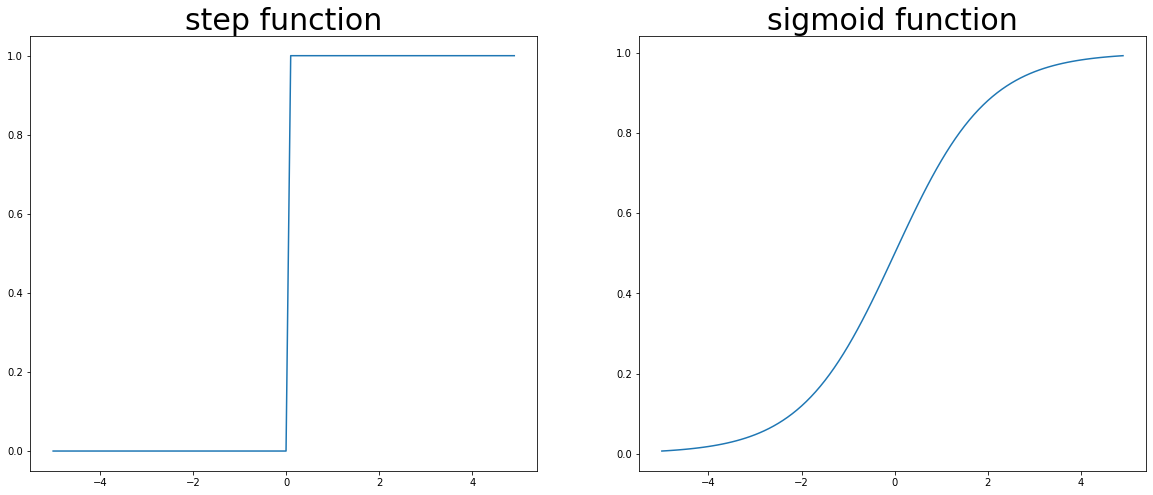

In [15]:
# 1행 2열의 그림을 그려서
# 계단 함수, 시그모이드 함수를 나란히 그려서 비교해보자.

fig, (axe1, axe2) = plt.subplots(1, 2, figsize=(20, 8))

x = np.arange(-5, 5, 0.1)

axe1.plot(x, step_function(x))  # 계단 함수
axe1.set_title("step function", fontsize=30)

axe2.plot(x, sigmoid(x))  # 시그모이드 함수
axe2.set_title("sigmoid function", fontsize=30)

plt.show()

In [16]:
# 계단 함수의 출력값 : 0 또는 1
# 시그모이드 함수의 출력값 : 0 ~ 1(0과 1이 되지는 않음. 비슷하게 갈 뿐)
# 시그모이드 함수에서 출력값이 1에 가까우면 흥분도가 높고, 0에 가까우면 흥분도가 낮다.

# 이 흥분도를 민감하게, 둔감하게 만들어주는 역할을 하는 것이 편향(bias)

In [17]:
# 계단 함수 : 어느 순간 계단 형태로 갑작스레 변화함
# 시그모이드 함수 : 부드러운 곡선의 형태 -> 이 매끄러움이 신경망 학습에서 중요한 역할을 함.

# 계단 함수 : 0과 1 중 하나의 값만 돌려줌
# 시그모이드 함수 : 0 ~ 1 사이의 실수 형태로 돌려줌

# 즉, 퍼셉트론에서는 0과 1만 출력되지만
# 신경망에서는 연속적인 실수가 흐른다.

# 공통점?
# 입력이 커지면 -> 출력값이 1에 가까워지거나 1이 된다.
# 입력이 작아지면 -> 출력값이 0에 가까워지거나 0이 된다.

In [18]:
# 즉, 계단 함수, 시그모이드 함수 모두 입력이 중요하면(입력값이 크면) 1에 가까워지고
# 반대로 입력이 중요하지 않으면 작은값(0에 가까워지는)값을 출력한다.

### 계단함수, 시그모이드 함수 공통점/차이점
- 공통점
- 입력값이 커질수록(중요할수록) -> 출력값이 1에 가까워진다.
- 입력값이 작아질수록(중요하지 않을수록) -> 출력값이 0에 가까워진다.

- 차이점
- 계단 함수 : 어느 순간 계단 형태로 갑자기 변함 -> 0 또는 1 값 출력
- 시그모이드 함수 : 부드러운 곡선의 형태 -> 실수 값 출력

## ReLU
- 입력값 <0 -> 0 출력
- 입력값 >=0 -> 입력값 그대로 출력
- y=x 함수에서 음수부분을 0으로 바꾼 것

In [19]:
# ReLU 함수
def relu(x):
  return np.maximum(0, x)

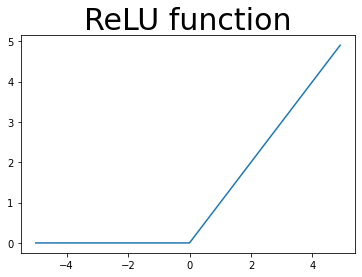

In [22]:
# ReLU 함수 시각화
x = np.arange(-5, 5, 0.1)
import matplotlib.pyplot as plt
plt.plot(x, relu(x))

plt.title("ReLU function", fontsize=30)

plt.show()

In [23]:
# sigmoid 함수는 부드러운 곡선을 만들어서 신경망 구축
# ReLU 함수는 여러개의 직선을 연결해서 신경망 구축

In [24]:
# 컴퓨터에서는 곡선 만들어서 표현하는 것보다 직선 여러개 놓고 표현하는 것이 더 효율이 좋기 때문에 sigmoid보다 ReLU 함수를 더 많이 사용